In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/Base_expro_bienes_y_servicios_5_años_V1.csv'
data = pd.read_csv(file_path, sep=';')

In [13]:


# Mostrar las primeras filas del archivo para inspeccionar el contenido
print("Primeras filas del archivo:")
print(data.head())

# Mostrar un resumen de la estructura de los datos
print("\nResumen del conjunto de datos:")
print(data.info())




Primeras filas del archivo:
   NIT Razón Social Cod. Depto Departamento Cod. Municipio Municipio  \
0  '-1  NO DEFINIDO        NaN          NaN            NaN       NaN   
1  '-1  NO DEFINIDO        NaN          NaN            NaN       NaN   
2  '-1  NO DEFINIDO        NaN          NaN            NaN       NaN   
3  '-1  NO DEFINIDO        NaN          NaN            NaN       NaN   
4  '-1  NO DEFINIDO        NaN          NaN            NaN       NaN   

  Exportadora no minera     Tipo   Cadena  \
0                   NaN  Mineras  Mineras   
1                   NaN  Mineras  Mineras   
2                   NaN  Mineras  Mineras   
3                   NaN  Mineras  Mineras   
4                   NaN  Mineras  Mineras   

                                   Sector  ... Departamento origen  \
0                                  Carbón  ...        Cundinamarca   
1  Oro, otros metales y piedras preciosas  ...           Antioquia   
2  Oro, otros metales y piedras preciosas  ...           A

In [14]:

# Mostrar estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Identificar valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())



Estadísticas descriptivas:
       Cod. Posición Arancelaria  Cod. Departamento origen
count               3.415410e+05             344728.000000
mean                5.456525e+09                 20.262340
std                 2.831793e+09                 22.451514
min                 0.000000e+00                  5.000000
25%                 3.305900e+09                  5.000000
50%                 6.108320e+09                 11.000000
75%                 8.413919e+09                 25.000000
max                 9.807200e+09                 99.000000

Valores faltantes por columna:
NIT                                    0
Razón Social                           0
Cod. Depto                           758
Departamento                         758
Cod. Municipio                       758
Municipio                            758
Exportadora no minera                758
Tipo                                   0
Cadena                                 0
Sector                                 0

Convertimos los valores de texto de las columnas FOB a númericos

In [15]:
def convertir_fob_a_numerico(df):
    fob_columns = ['USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022']

    # Reemplazamos comas por puntos y convertimos a formato numérico
    # Check if the column type is not already numeric
    for column in fob_columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].str.replace(',', '').astype(float)

    return df

Ahora realizamos el EDA

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Resumen estadístico (top 20)
def generar_resumen_estadistico_top20(df):
    return df.nlargest(20, ['USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022'])

# 2. Verificar tipos de datos (no cambia para top 20)
def verificar_tipos_datos(df):
    return df.dtypes

# 3. Distribución de las Categorías (top 20), gráficas horizontales ordenadas de mayor a menor
def graficar_distribuciones_categorias_top20(df, columna):
    top20_df = df[columna].value_counts().nlargest(20)
    plt.figure(figsize=(10,6))
    top20_df.sort_values(ascending=True).plot(kind='barh')  # Horizontal, mayor a menor
    plt.title(f'Top 20 Distribución de {columna}')
    plt.ylabel('Frecuencia')
    plt.xlabel(columna)
    plt.tight_layout()
    plt.show()

# 4. Análisis geográfico (top 20), gráficas horizontales de mayor a menor
def graficar_exportaciones_geograficas_top20(df):
    plt.figure(figsize=(10,6))
    df['Departamento'].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')
    plt.title('Top 20 Exportaciones por Departamento')
    plt.ylabel('Frecuencia')
    plt.xlabel('Departamento')
    plt.tight_layout()
    plt.show()




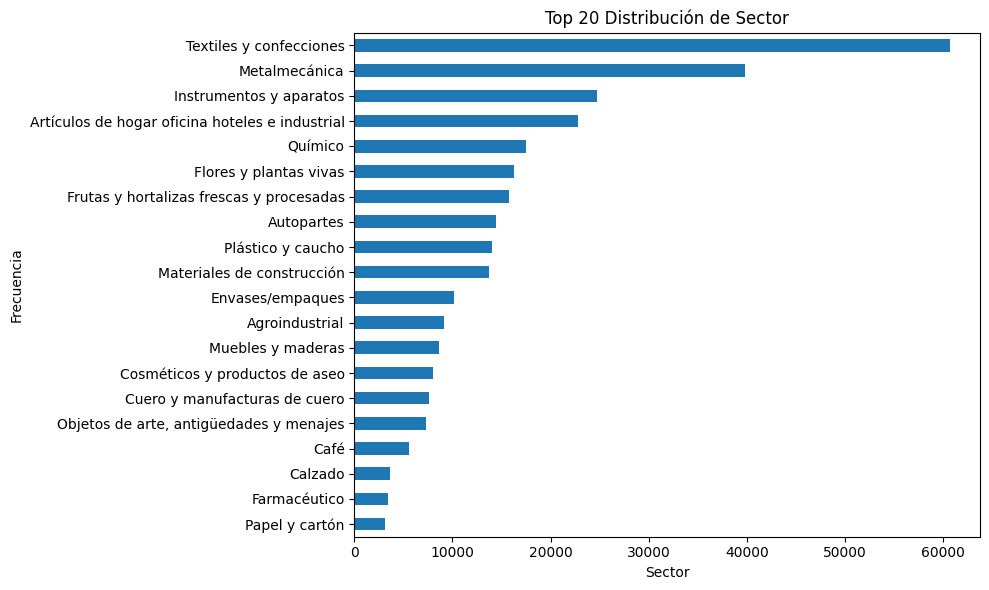

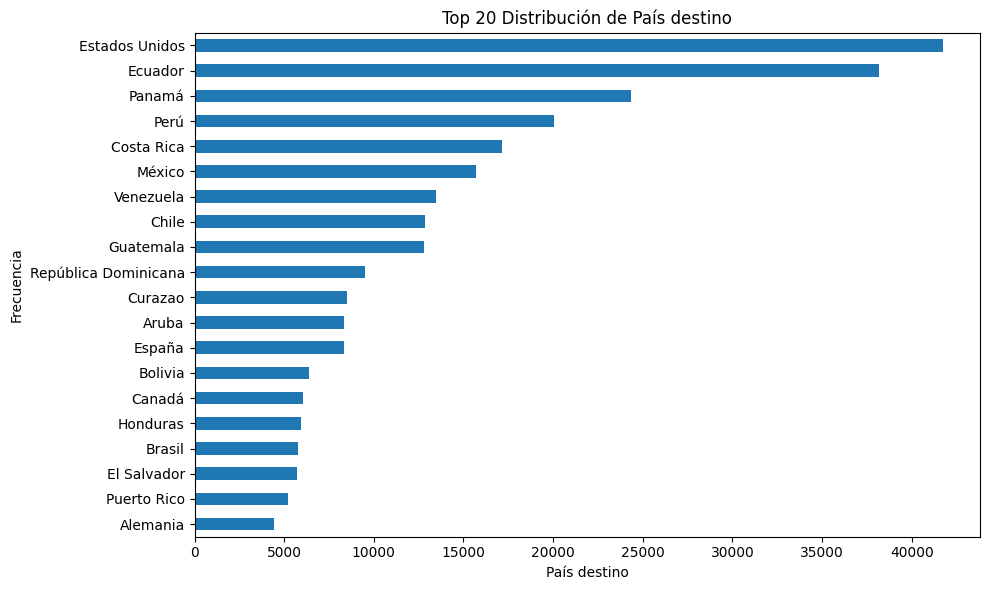

In [17]:
# Aplicar el análisis al dataset

# Convertir FOB a numérico para asegurar consistencia
data = convertir_fob_a_numerico(data)

# 1. Resumen estadístico top 20
resumen_estadistico_top20 = generar_resumen_estadistico_top20(data)

# 2. Tipos de datos
tipos_datos = verificar_tipos_datos(data)

# 3. Graficar distribuciones para Sector y País destino (top 20)
graficar_distribuciones_categorias_top20(data, 'Sector')
graficar_distribuciones_categorias_top20(data, 'País destino')

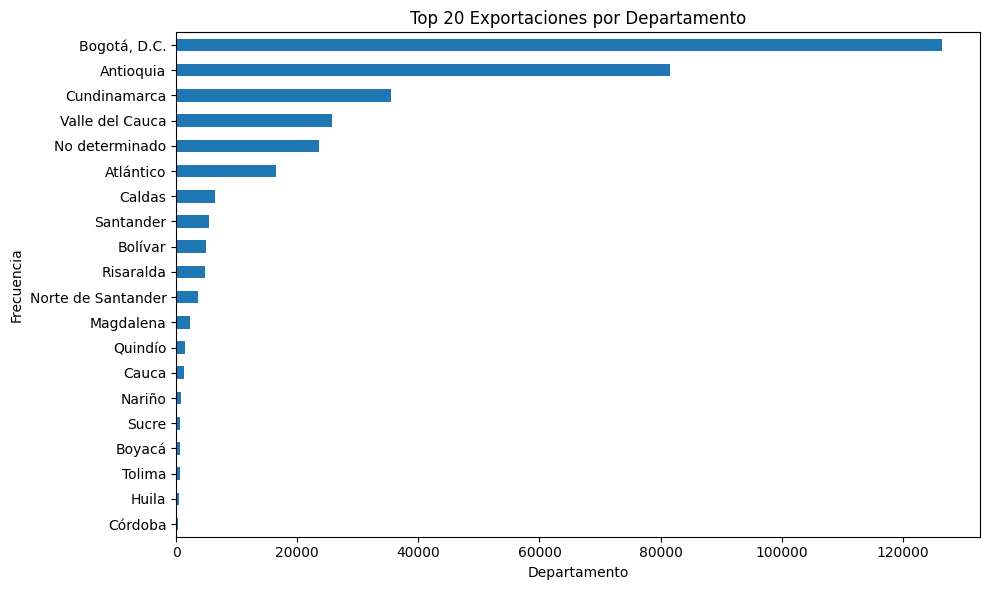

In [15]:
# 4. Graficar análisis geográfico (top 20)
graficar_exportaciones_geograficas_top20(data)



<Figure size 1200x800 with 0 Axes>

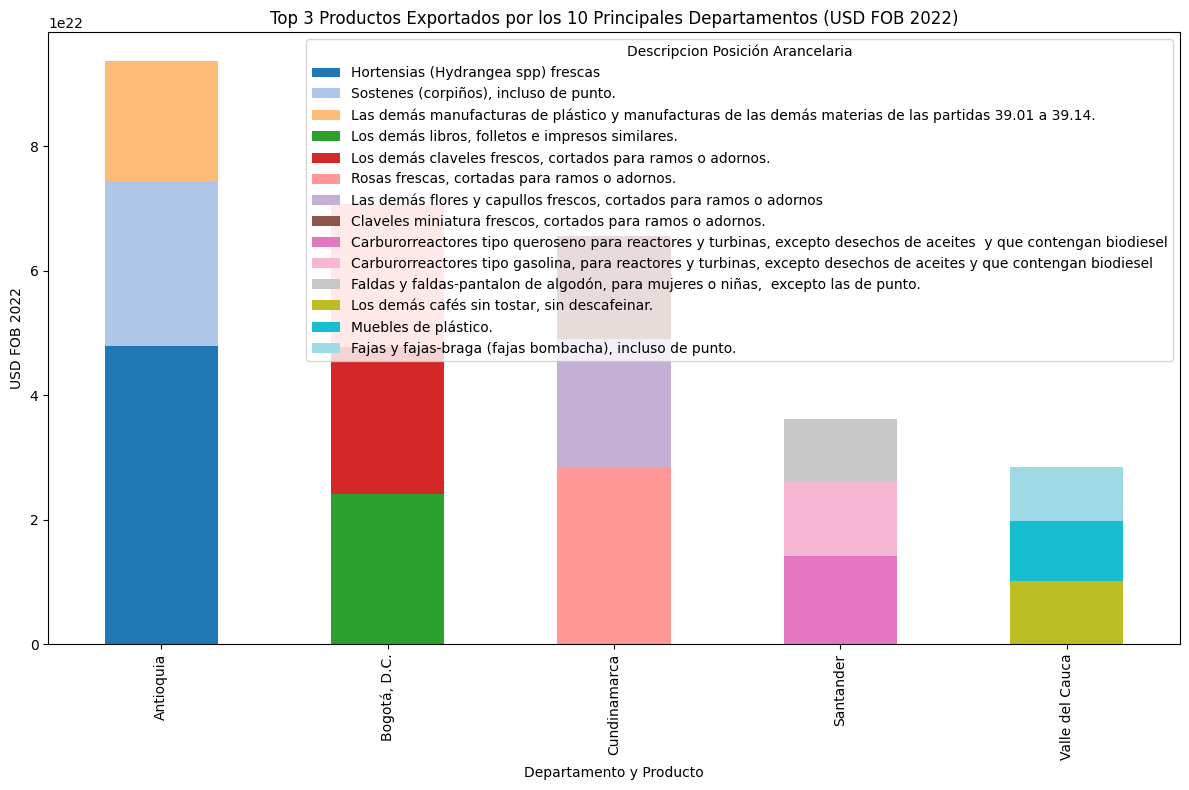

In [18]:
# Para obtener los 3 productos más exportados por los 5 principales departamentos

import pandas as pd


# Replace any non-numeric values in 'USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022' with NaN
for col in ['USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create a new dataframe 'data_numeric' where rows with any NaN values in the specified columns are dropped
data_numeric = data.dropna(subset=['USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022'])

# Agrupamos por 'Departamento origen' y 'Descripcion Posición Arancelaria', y luego sumamos 'USD FOB 2022'
top_5_departments = data_numeric.groupby('Departamento origen')['USD FOB 2022'].sum().sort_values(ascending=False).head(5).index

# Filtramos los datos para esos 5 departamentos
filtered_data = data_numeric[data_numeric['Departamento origen'].isin(top_5_departments)]

# Agrupamos por Departamento y Descripcion de Posición Arancelaria y sumamos exportaciones
top_products_by_dept = filtered_data.groupby(['Departamento origen', 'Descripcion Posición Arancelaria'])['USD FOB 2022'].sum()

# Obtenemos los 2 principales productos para cada departamento
top_3_products_by_dept = top_products_by_dept.groupby('Departamento origen').nlargest(3).reset_index(level=0, drop=True)

# Crear el gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
top_3_products_by_dept.unstack().plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Top 3 Productos Exportados por los 10 Principales Departamentos (USD FOB 2022)')
plt.xlabel('Departamento y Producto')
plt.ylabel('USD FOB 2022')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-27-a42b4be71dab>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

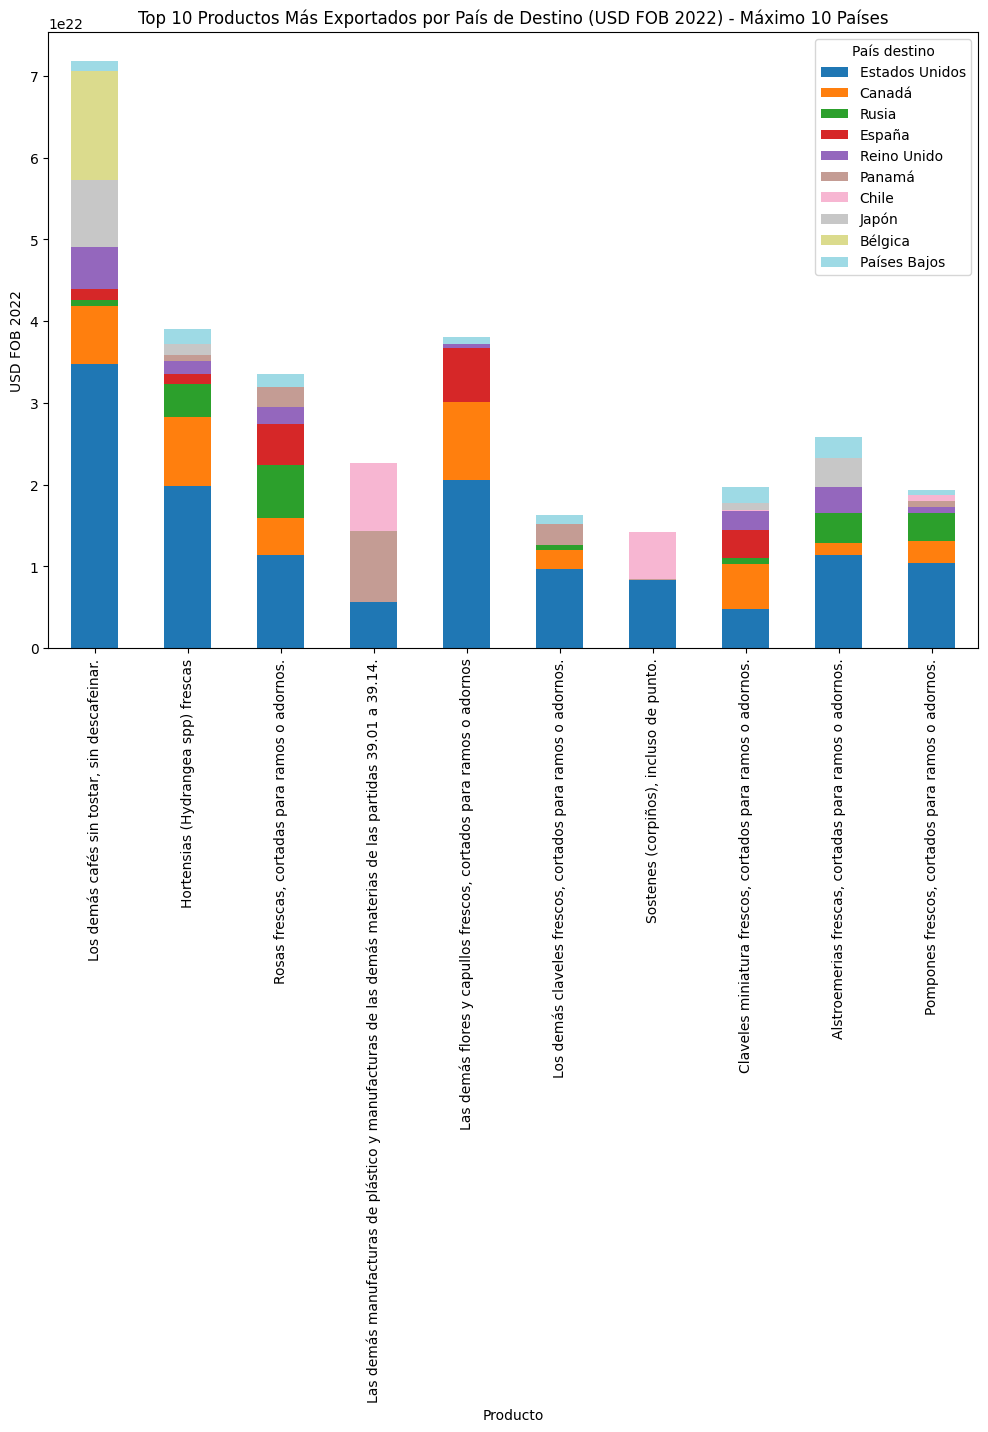

In [27]:
import matplotlib.pyplot as plt

# Agrupamos por 'Descripcion Posición Arancelaria' y 'País destino' y sumamos las exportaciones de 2022
top_products = data_numeric.groupby(['Descripcion Posición Arancelaria', 'País destino'])['USD FOB 2022'].sum()

# Obtenemos los 10 principales productos exportados
top_10_products = top_products.groupby('Descripcion Posición Arancelaria').sum().sort_values(ascending=False).head(10).index

# Filtramos los datos para esos 10 productos
filtered_top_products = top_products.loc[top_10_products]

# Limitamos a los 10 países destino más importantes
top_10_countries = filtered_top_products.groupby('País destino').sum().sort_values(ascending=False).head(10).index

# Filtramos los datos para esos 10 países

filtered_top_products = filtered_top_products.loc[(slice(None), top_10_countries)]

# Crear gráfico de barras apiladas con el top 10 de productos y países destino (máximo 10 países)
plt.figure(figsize=(12, 8))
filtered_top_products.unstack().plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Top 10 Productos Más Exportados por País de Destino (USD FOB 2022) - Máximo 10 Países')
plt.xlabel('Producto')
plt.ylabel('USD FOB 2022')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Análisis para identificar qué productos o bienes (por sector, subsector, o descripción arancelaria) tienen mayor representación en las exportaciones.

In [28]:
# Identificar los bienes más exportados según la descripción arancelaria
productos_mas_exportados = data['Descripcion Posición Arancelaria'].value_counts().nlargest(30)
print(productos_mas_exportados)

Descripcion Posición Arancelaria
Menajes.                                                                                                                                             6855
Los demás cafés sin tostar, sin descafeinar.                                                                                                         5550
Las demás manufacturas de plástico y manufacturas de las demás materias de las partidas 39.01 a 39.14.                                               3671
Rosas frescas, cortadas para ramos o adornos.                                                                                                        2828
Impresos publicitarios, catalogos comerciales y similares.                                                                                           2378
Hortensias (Hydrangea spp) frescas                                                                                                                   2180
Las demás flores y capullos frescos, cortad

<ipython-input-30-0549aee70b9f>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


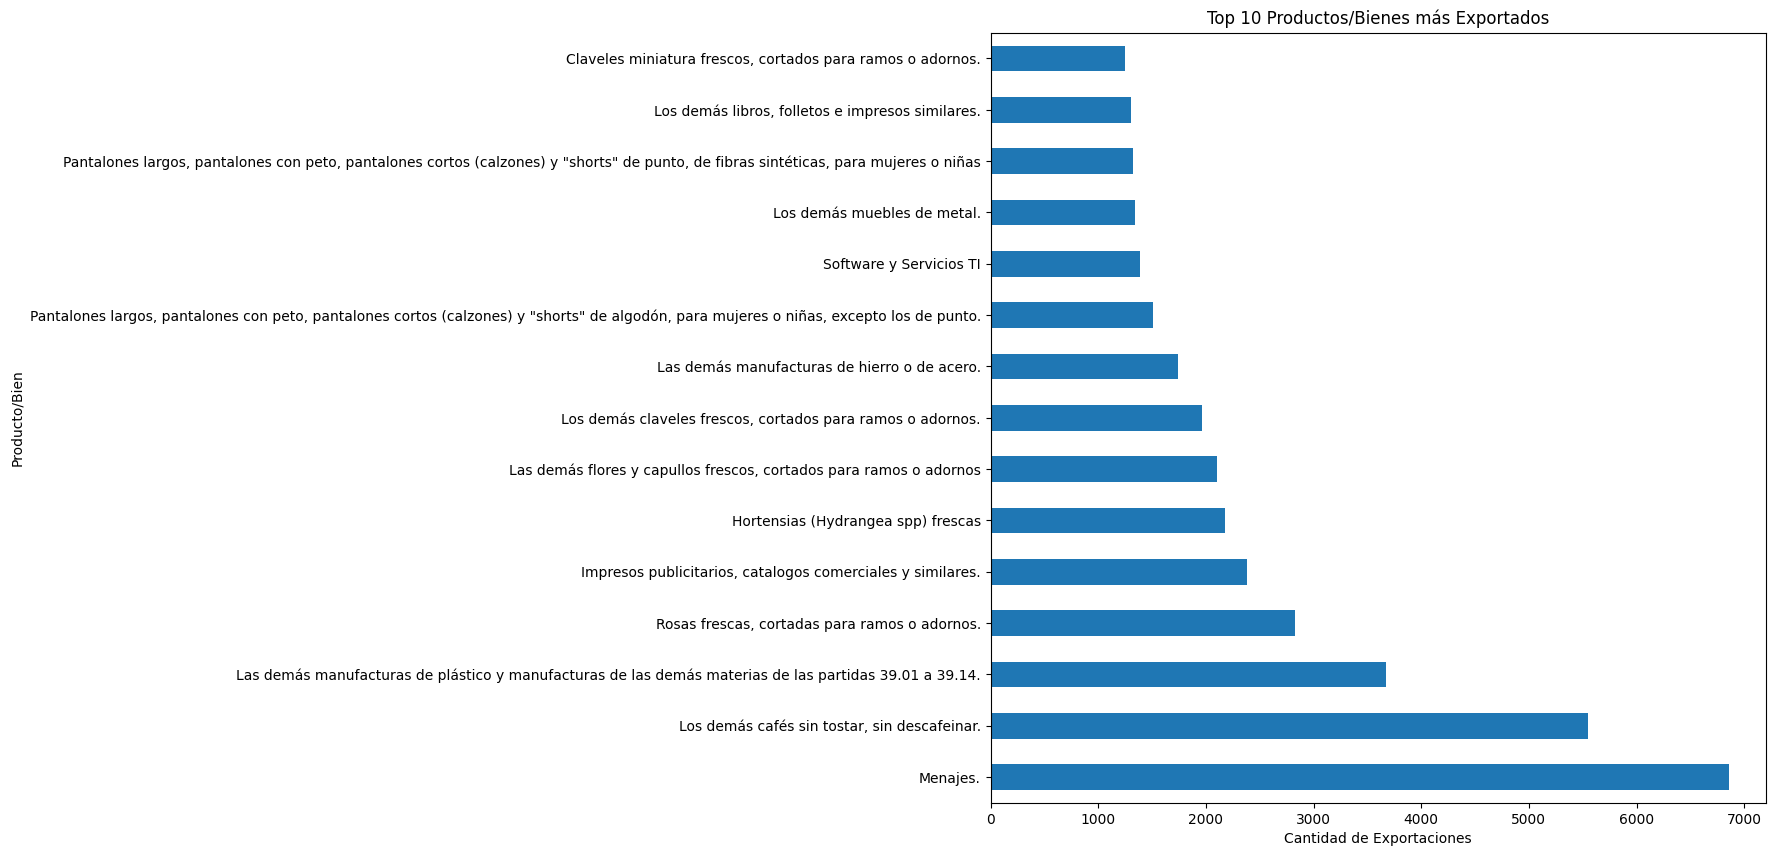

In [30]:
# Generar una gráfica de los productos o bienes más exportados
productos_mas_exportados = data['Descripcion Posición Arancelaria'].value_counts().nlargest(15)

# Crear la gráfica de los productos más exportados
plt.figure(figsize=(10, 10))
productos_mas_exportados.plot(kind='barh')
plt.title('Top 10 Productos/Bienes más Exportados')
plt.xlabel('Cantidad de Exportaciones')
plt.ylabel('Producto/Bien')
plt.tight_layout()
plt.show()

COMPARACION ENTRE SECTORES

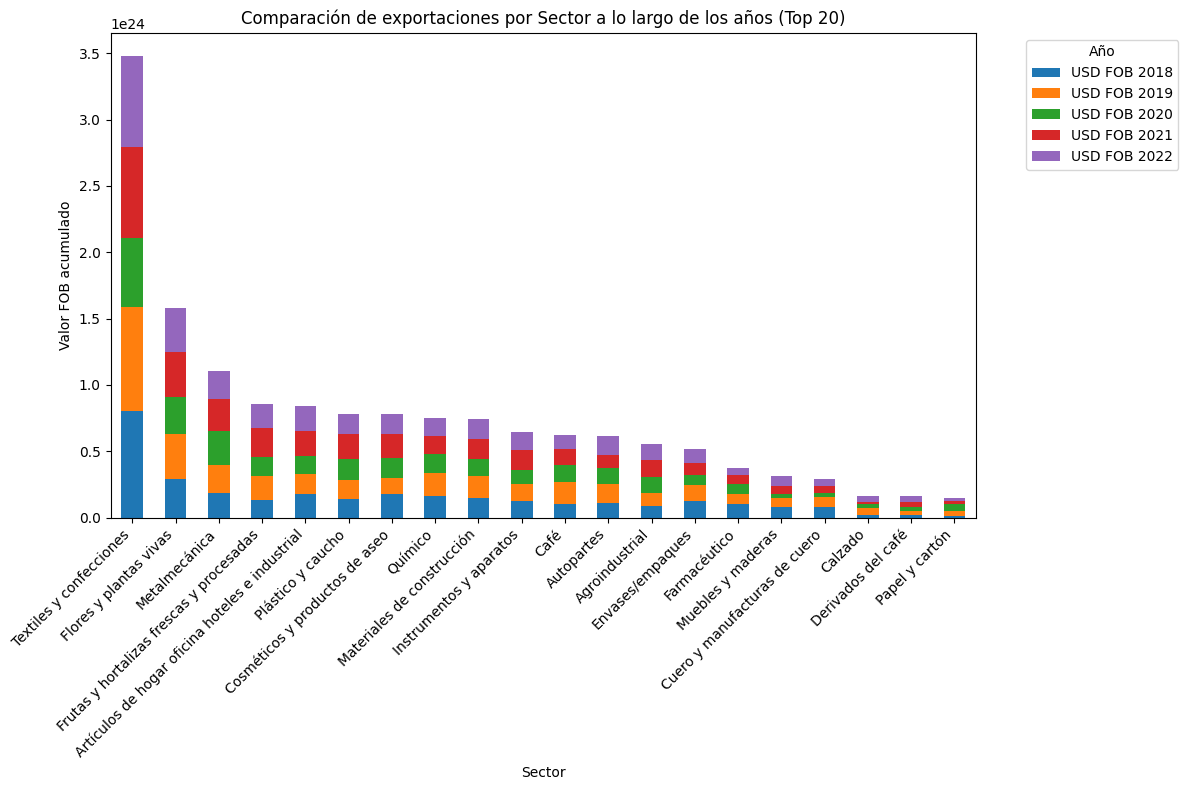

In [31]:
# Agrupar los valores FOB por sector y sumar por año
sector_fob = data.groupby('Sector')[['USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022']].sum()

# Calcular el total acumulado por sector
sector_fob['Total FOB'] = sector_fob.sum(axis=1)

# Filtrar el top 20 sectores con mayor FOB acumulado
sector_fob_top20 = sector_fob.nlargest(20, 'Total FOB')

# Crear el gráfico apilado y ordenar de mayor a menor por el valor acumulado
sector_fob_top20.drop(columns='Total FOB').plot(kind='bar', stacked=True, figsize=(12, 8))

# Añadir títulos y etiquetas
plt.title('Comparación de exportaciones por Sector a lo largo de los años (Top 20)')
plt.ylabel('Valor FOB acumulado')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Top 5 productos por departamento:
Departamento origen
Antioquia                                                   [Hortensias (Hydrangea spp) frescas, Sostenes ...
Arauca                                                      [Madera moldurada, distinta  de las de conífer...
Archipiélago de San Andrés, Providencia y Santa Catalina    [Perfumes y aguas de tocador., Desperdicios y ...
Atlántico                                                   [Carburorreactores tipo queroseno para reactor...
Bogotá, D.C.                                                [Los demás libros, folletos e impresos similar...
Bolívar                                                     [Policloruro de vinilo,  sin mezclar con otras...
Boyacá                                                      [Cebollas secas, bien trituradas o pulverizada...
Caldas                                                      [Machetes, de metales comunes., Los demás café...
Caquetá                                                     [Oro(i

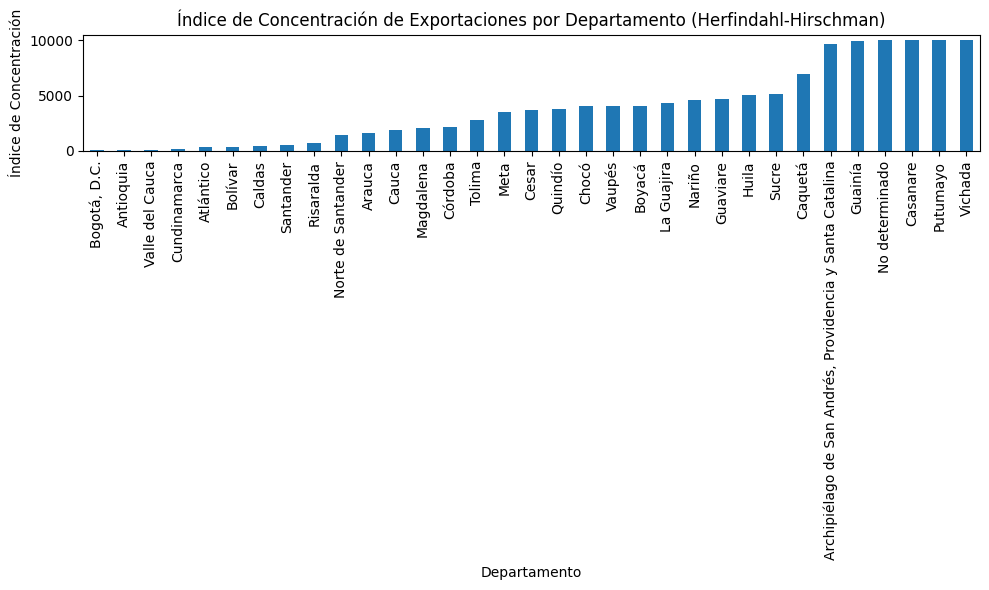


Productos con mayor potencial de exportación según el éxito en otros departamentos:
['Los demás cafés sin tostar, sin descafeinar.', 'Hortensias (Hydrangea spp) frescas', 'Rosas frescas, cortadas para ramos o adornos.', 'Las demás manufacturas de plástico y manufacturas de las demás materias de las partidas 39.01 a 39.14.', 'Las demás flores y capullos frescos, cortados para ramos o adornos', 'Los demás claveles frescos, cortados para ramos o adornos.', 'Sostenes (corpiños), incluso de punto.', 'Claveles miniatura frescos, cortados para ramos o adornos.', 'Alstroemerias frescas, cortadas para ramos o adornos.', 'Pompones frescos, cortados para ramos o adornos.']


<ipython-input-34-05e28cce16e7>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

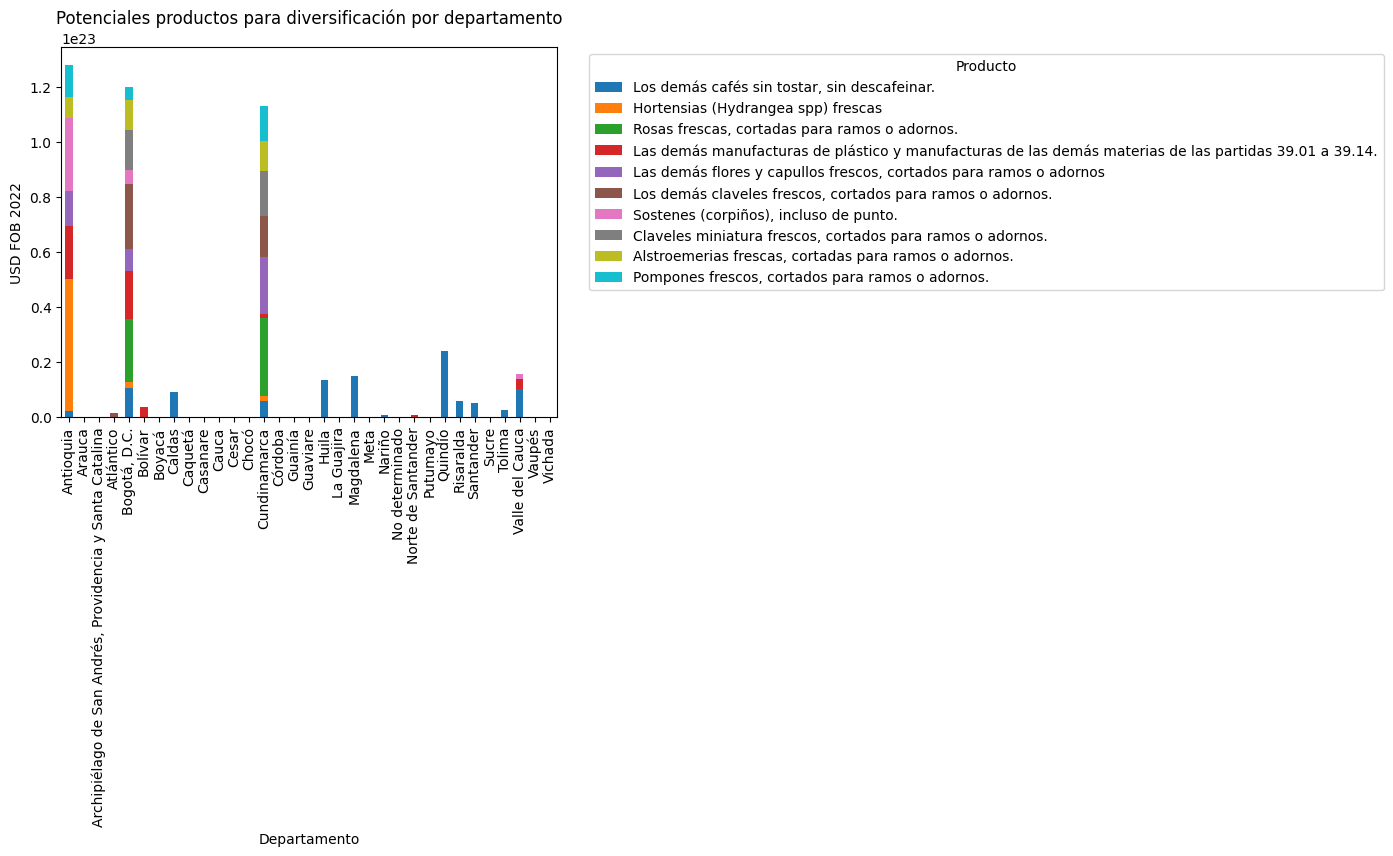

In [34]:
# Agrupamos por 'Departamento origen' y 'Descripcion Posición Arancelaria' y sumamos las exportaciones de 2022
dept_product_exports = data_numeric.groupby(['Departamento origen', 'Descripcion Posición Arancelaria'])['USD FOB 2022'].sum().unstack()

# Paso 1: Comparación entre departamentos
# Creamos una tabla que muestre la participación relativa de cada producto en cada departamento
dept_product_exports_percent = dept_product_exports.div(dept_product_exports.sum(axis=1), axis=0) * 100

# Mostramos el top 5 de productos más exportados en cada departamento
top_5_per_dept = dept_product_exports.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
print("Top 5 productos por departamento:")
print(top_5_per_dept)

# Paso 2: Diversificación
# Calcular el índice de concentración de Herfindahl-Hirschman para cada departamento
hh_index = (dept_product_exports_percent ** 2).sum(axis=1)
print("\nÍndice de concentración de exportaciones por departamento (Herfindahl-Hirschman):")
print(hh_index)

# Identificamos productos con bajo volumen en algunos departamentos, pero con alto volumen en otros
potential_diversification = dept_product_exports.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

# Gráfico del índice de concentración
plt.figure(figsize=(10, 6))
hh_index.sort_values().plot(kind='bar')
plt.title('Índice de Concentración de Exportaciones por Departamento (Herfindahl-Hirschman)')
plt.xlabel('Departamento')
plt.ylabel('Índice de Concentración')
plt.tight_layout()
plt.show()

# Productos con alto potencial de diversificación: buscar productos exitosos en otros departamentos
dept_product_exports_sum = dept_product_exports.sum(axis=0)
top_potential_products = dept_product_exports_sum.nlargest(10).index.tolist()
print("\nProductos con mayor potencial de exportación según el éxito en otros departamentos:")
print(top_potential_products)

# Gráfico de los productos con mayor potencial de exportación por departamento
plt.figure(figsize=(10, 8))
dept_product_exports[top_potential_products].plot(kind='bar', stacked=True)
plt.title('Potenciales productos para diversificación por departamento')
plt.xlabel('Departamento')
plt.ylabel('USD FOB 2022')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Comparacion entre sectores

Sectores con más variabilidad entre departamentos:
Sector
Textiles y confecciones                     100.000000
Petróleo y sus derivados                    100.000000
Aceites y grasas                            100.000000
Cosméticos y productos de aseo               98.420535
Oro, otros metales y piedras preciosas       83.058285
Café                                         69.502449
Muebles y maderas                            59.974671
Carbón                                       55.380153
Frutas y hortalizas frescas y procesadas     53.145044
Azúcar                                       44.941391
dtype: float64


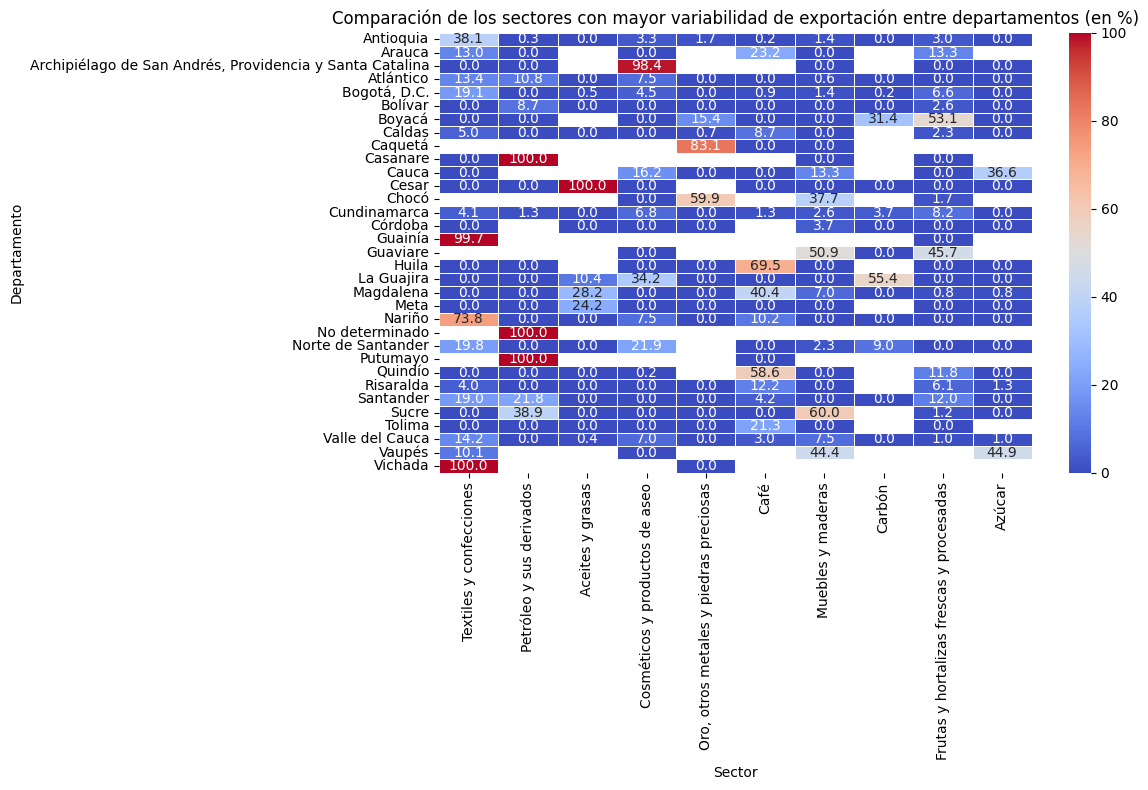

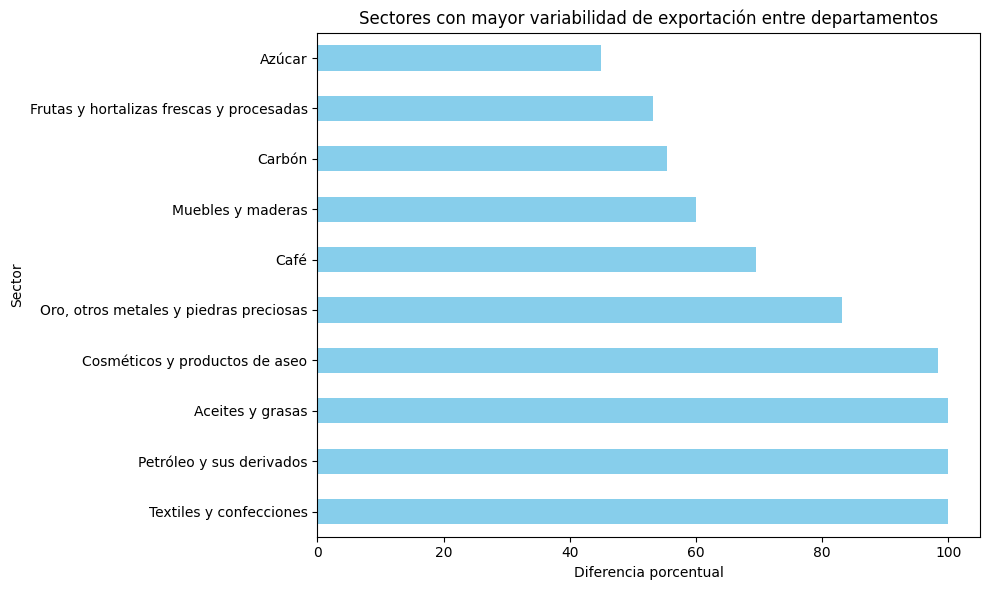

In [37]:
# Agrupamos por 'Departamento origen' y 'Sector' y sumamos las exportaciones de 2022
dept_sector_exports = data_numeric.groupby(['Departamento origen', 'Sector'])['USD FOB 2022'].sum().unstack()

# Normalizamos los datos dividiendo por el total de exportaciones de cada departamento para obtener proporciones
dept_sector_exports_percent = dept_sector_exports.div(dept_sector_exports.sum(axis=1), axis=0) * 100

# Creamos una tabla de comparación, que muestra la diferencia entre el % máximo y el % mínimo de cada sector entre departamentos
sector_comparison = dept_sector_exports_percent.max(axis=0) - dept_sector_exports_percent.min(axis=0)

# Ordenamos para obtener los sectores con mayor variabilidad entre departamentos
top_variability_sectors = sector_comparison.sort_values(ascending=False).head(10)

# Mostrar los sectores con más variabilidad entre departamentos
print("Sectores con más variabilidad entre departamentos:")
print(top_variability_sectors)

# Gráfico de calor (heatmap) para visualizar la exportación de los sectores con mayor variabilidad en los departamentos
plt.figure(figsize=(12, 8))
sns.heatmap(dept_sector_exports_percent[top_variability_sectors.index], cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Comparación de los sectores con mayor variabilidad de exportación entre departamentos (en %)')
plt.xlabel('Sector')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

# Gráfico de barras para los sectores con mayor variabilidad de exportación
plt.figure(figsize=(10, 6))
top_variability_sectors.plot(kind='barh', color='skyblue')
plt.title('Sectores con mayor variabilidad de exportación entre departamentos')
plt.xlabel('Diferencia porcentual')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

Análisis de crecimiento de exportaciones por departamento

Análisis de Diversificación de Exportaciones

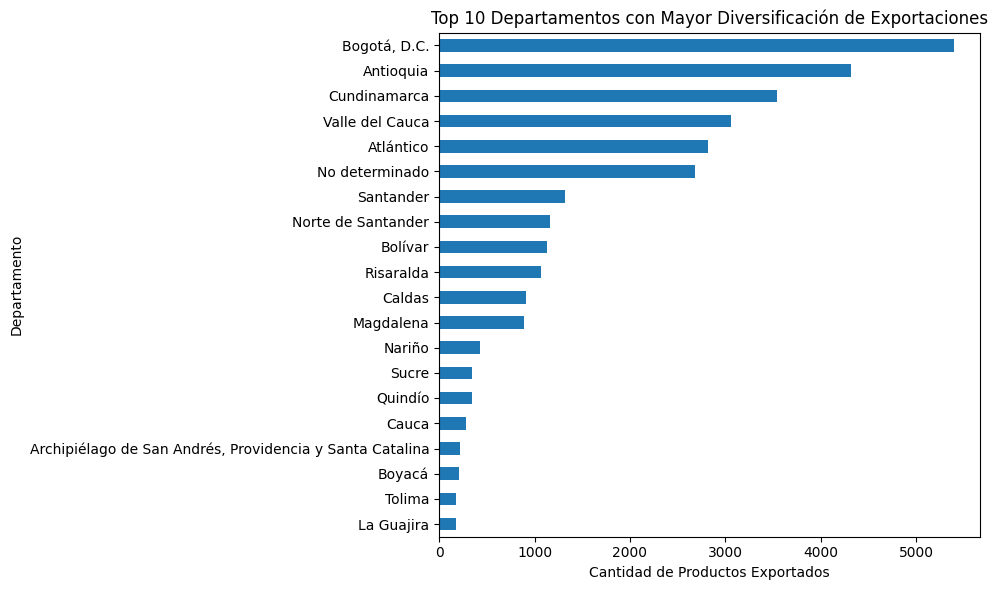

In [39]:
  # Contar la cantidad de productos diferentes exportados por cada departamento
dept_diversificacion = data.groupby('Departamento')['Descripcion Posición Arancelaria'].nunique()

# Filtrar los 20 departamentos más diversificados
dept_diversificacion_top = dept_diversificacion.nlargest(20)

# Graficar la diversificación por departamento
plt.figure(figsize=(10,6))
dept_diversificacion_top.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Departamentos con Mayor Diversificación de Exportaciones')
plt.xlabel('Cantidad de Productos Exportados')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

Identificación de Productos Estratégicos por Departamento

In [40]:
# Calcular la proporción de exportaciones de los principales productos por departamento
productos_por_departamento = data.groupby(['Departamento', 'Descripcion Posición Arancelaria'])[['USD FOB 2022']].sum()

# Normalizar para obtener la proporción por departamento
# Resetear el índice antes de la asignación para evitar el error de niveles de MultiIndex
productos_por_departamento = productos_por_departamento.reset_index()
productos_por_departamento['Proporción'] = productos_por_departamento.groupby('Departamento')['USD FOB 2022'].transform(lambda x: x / x.sum())

# Volver a establecer el MultiIndex si es necesario
productos_por_departamento = productos_por_departamento.set_index(['Departamento', 'Descripcion Posición Arancelaria'])

# Filtrar el top 5 productos estratégicos para cada departamento
productos_estrategicos = productos_por_departamento.groupby('Departamento').apply(lambda x: x.nlargest(5, 'USD FOB 2022'))

print(productos_estrategicos)

                                                                                    USD FOB 2022  \
Departamento    Departamento    Descripcion Posición Arancelaria                                   
Amazonas        Amazonas        Claveles miniatura frescos, cortados para ramos...  4.368294e+06   
                                Las demás estatuillas yu demás objetos de adorno    4.277650e+05   
                                Alstroemerias frescas, cortadas para ramos o ad...  0.000000e+00   
                                Camiones-grúa.                                      0.000000e+00   
                                Energía eléctrica                                   0.000000e+00   
...                                                                                          ...   
Valle del Cauca Valle del Cauca Los demás azúcares de caña o de remolacha y sac...  7.345856e+21   
Vichada         Vichada         Los demás azúcares de caña en bruto, sin adició...  7.465360e+07   


Análisis de Competitividad Exportadora

Análisis Temporal del Potencial Exportador

In [47]:
# Agrupar las exportaciones por país destino y departamento
destinos_por_departamento = data.groupby(['Departamento', 'País destino'])[['USD FOB 2022']].sum()

# Identificar los destinos emergentes por crecimiento
destinos_emergentes = destinos_por_departamento.groupby('Departamento').apply(lambda x: x.nlargest(3, 'USD FOB 2022'))
print(destinos_emergentes)

                                                USD FOB 2022
Departamento    Departamento    País destino                
Amazonas        Amazonas        Estados Unidos  4.368294e+06
                                Italia          4.277650e+05
                                Brasil          0.000000e+00
Antioquia       Antioquia       Estados Unidos  1.367910e+23
                                Ecuador         1.213174e+23
...                                                      ...
Valle del Cauca Valle del Cauca Ecuador         6.403906e+22
                                Estados Unidos  4.947650e+22
                                Panamá          3.340961e+22
Vichada         Vichada         Estados Unidos  1.042159e+08
                                Puerto Rico     0.000000e+00

[92 rows x 1 columns]


Índice de Ventaja Comparativa Revelada (IVCR) por producto:
Descripcion Posición Arancelaria
Los demás cafés sin tostar, sin descafeinar.                                                              0.029522
Hortensias (Hydrangea spp) frescas                                                                        0.014755
Rosas frescas, cortadas para ramos o adornos.                                                             0.014477
Las demás manufacturas de plástico y manufacturas de las demás materias de las partidas 39.01 a 39.14.    0.013043
Las demás flores y capullos frescos, cortados para ramos o adornos                                        0.011765
Los demás claveles frescos, cortados para ramos o adornos.                                                0.011239
Sostenes (corpiños), incluso de punto.                                                                    0.009428
Claveles miniatura frescos, cortados para ramos o adornos.                                            

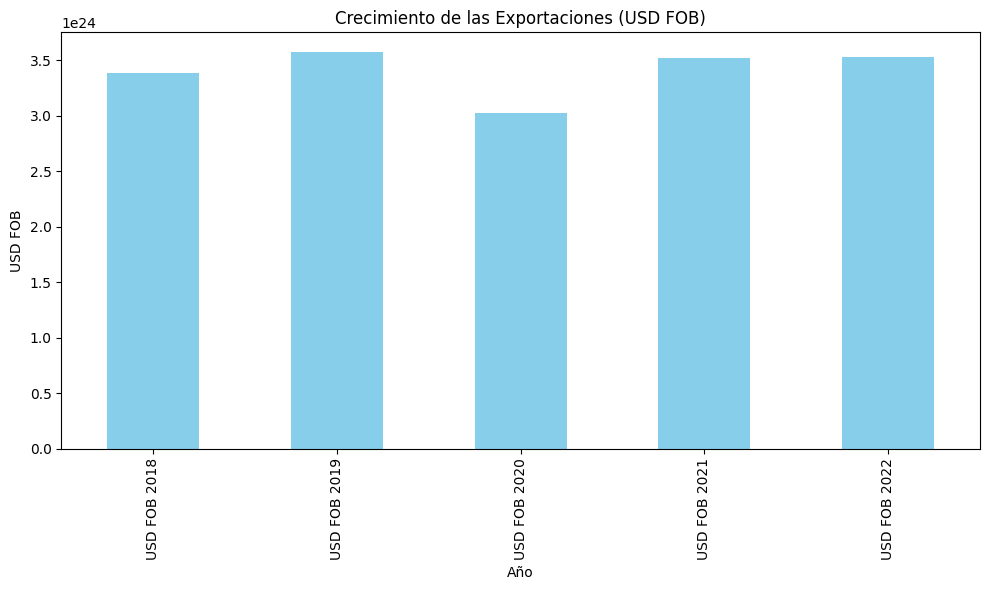


Índice Herfindahl-Hirschman de concentración de mercados destino: 649.39


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Calcular el IVCR para cada producto
# Exportaciones mundiales de cada producto (esto debería ser proporcionado o estimado)
exportaciones_mundiales_producto = data_numeric.groupby('Descripcion Posición Arancelaria')['USD FOB 2022'].sum().sum()

# Exportaciones mundiales totales (esto debería ser proporcionado o estimado)
exportaciones_mundiales_totales = data_numeric['USD FOB 2022'].sum()

# Exportaciones del país para cada producto
exportaciones_pais_producto = data_numeric.groupby('Descripcion Posición Arancelaria')['USD FOB 2022'].sum()

# Exportaciones totales del país
exportaciones_totales_pais = data_numeric['USD FOB 2022'].sum()

# Calcular el IVCR
ivcr = (exportaciones_pais_producto / exportaciones_totales_pais) / (exportaciones_mundiales_producto / exportaciones_mundiales_totales)

# Mostrar los productos con mayor IVCR
print("Índice de Ventaja Comparativa Revelada (IVCR) por producto:")
print(ivcr.sort_values(ascending=False).head(10))

# Paso 2: Calcular el índice de concentración (Herfindahl-Hirschman) por sector
sector_exports = data_numeric.groupby('Sector')['USD FOB 2022'].sum()
sector_exports_percent = sector_exports / sector_exports.sum() * 100

# Índice Herfindahl-Hirschman para medir la concentración por sector
hhi_sector = (sector_exports_percent ** 2).sum()
print(f"\nÍndice Herfindahl-Hirschman de concentración sectorial: {hhi_sector:.2f}")

# Paso 3: Análisis de crecimiento de las exportaciones (comparación entre años)
# Agrupamos por año y sector para analizar la evolución
year_exports = data_numeric[['USD FOB 2018', 'USD FOB 2019', 'USD FOB 2020', 'USD FOB 2021', 'USD FOB 2022']]
year_exports_sum = year_exports.sum()

# Gráfico de crecimiento de exportaciones por año
plt.figure(figsize=(10, 6))
year_exports_sum.plot(kind='bar', color='skyblue')
plt.title('Crecimiento de las Exportaciones (USD FOB)')
plt.xlabel('Año')
plt.ylabel('USD FOB')
plt.tight_layout()
plt.show()

# Paso 4: Diversificación de mercados (concentración por país destino)
country_exports = data_numeric.groupby('País destino')['USD FOB 2022'].sum()
country_exports_percent = country_exports / country_exports.sum() * 100

# Índice Herfindahl-Hirschman para concentración de mercados
hhi_country = (country_exports_percent ** 2).sum()
print(f"\nÍndice Herfindahl-Hirschman de concentración de mercados destino: {hhi_country:.2f}")



ANALISIS DE INFORMACION EXTERNA RELACIONADA CON EXPORTACIONES E IMPORTACIONES EN EL MUNDO



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

# Define the full paths to the files within your Google Drive
exportaciones_file = '/content/drive/My Drive/API_NE.EXP.GNFS.ZS_DS2_es_csv_v2_27322.csv'
metadata_file = '/content/drive/My Drive/Metadata_Country_API_NE.EXP.GNFS.ZS_DS2_es_csv_v2_27322.csv'

# Leer el archivo de exportaciones y metadatos using the full paths
exportaciones_data = pd.read_csv(exportaciones_file, skiprows=4, encoding='latin1')
metadata_data = pd.read_csv(metadata_file, encoding='latin1')

# Revisar las primeras filas de cada archivo para asegurarse que se han cargado correctamente
print(exportaciones_data.head())
print(metadata_data.head())

  Country Name Country Code                                   Indicator Name  \
0        Aruba          ABW  Exportaciones de bienes y servicios (% del PIB)   
1          NaN          AFE  Exportaciones de bienes y servicios (% del PIB)   
2  AfganistÃ¡n          AFG  Exportaciones de bienes y servicios (% del PIB)   
3          NaN          AFW  Exportaciones de bienes y servicios (% del PIB)   
4       Angola          AGO  Exportaciones de bienes y servicios (% del PIB)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...       2015  \
0  NE.EXP.GNFS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  72.852913   
1  NE.EXP.GNFS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  24.046024   
2  NE.EXP.GNFS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
3  NE.EXP.GNFS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
4  NE.EXP.GNFS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  29.754598   

        2016       2017       2018       2019       2020       2021  \
0  71.820

In [9]:
# Combinamos ambos archivos utilizando el 'Country Code' como clave
combined_data = pd.merge(exportaciones_data, metadata_data, left_on='Country Code', right_on='Country Code')

# Revisamos las primeras filas del archivo combinado para asegurarnos de que el merge se realizó correctamente
combined_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,2023,Unnamed: 68,"ï»¿""Country Name""",Region,Income_Group,Unnamed: 4
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.234592,55.326810,69.069709,83.124605,NaN,NaN,Aruba,NaN,Ingreso alto,NaN
1,NaN,AFE,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.903124,22.036160,25.922406,27.595354,24.503160,NaN,NaN,NaN,Agregados,NaN
2,AfganistÃ¡n,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.420817,14.342153,18.380042,NaN,NaN,AfganistÃ¡n,Asia meridional,PaÃ­ses de ingreso bajo,NaN
3,NaN,AFW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agregados,NaN
4,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.790755,38.314541,47.745276,44.399617,39.872673,NaN,Angola,Ãfrica al sur del Sahara (excluido altos ingr...,PaÃ­ses de ingreso mediano bajo,NaN


Region
Oriente Medio y Norte de Ãfrica (excluido altos ingresos)    51.105098
Europa y Asia central (excluido altos ingresos)               44.184448
Asia oriental y el PacÃ­fico (excluido altos ingresos)        42.211547
AmÃ©rica Latina y el Caribe (excluido altos ingresos)         31.224661
Ãfrica al sur del Sahara (excluido altos ingresos)           30.920112
Asia meridional                                               17.008470
Name: 2022, dtype: float64


<ipython-input-10-b66461c2a632>:16: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


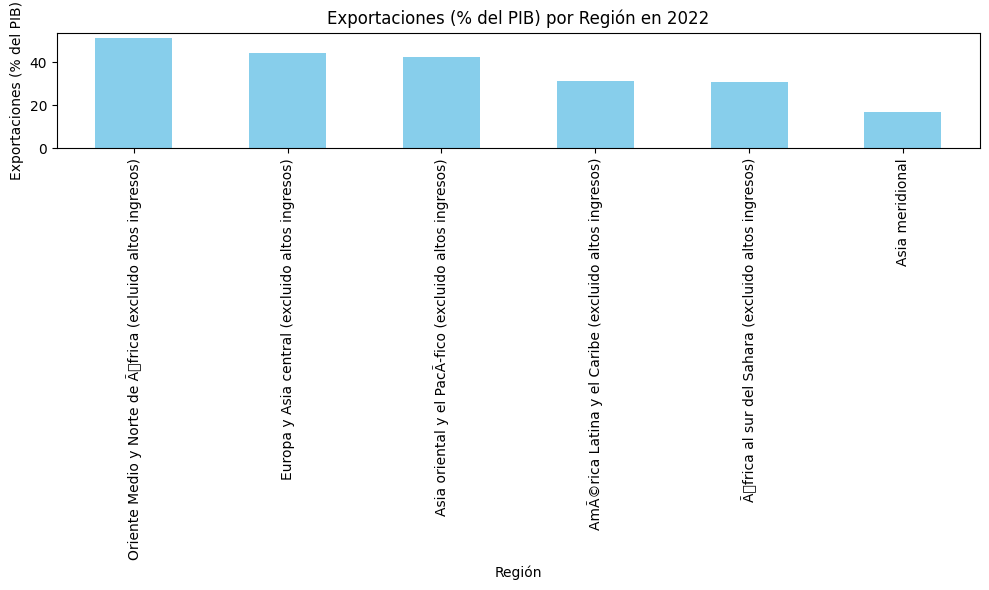

In [10]:
# Agrupar por región y calcular la media de exportaciones (% del PIB) en 2022
region_exports = combined_data.groupby('Region')['2022'].mean().sort_values(ascending=False)

# Mostrar los resultados
print(region_exports)

# Visualización del análisis
import matplotlib.pyplot as plt

# Gráfico de barras de exportaciones por región
plt.figure(figsize=(10, 6))
region_exports.plot(kind='bar', color='skyblue')
plt.title('Exportaciones (% del PIB) por Región en 2022')
plt.xlabel('Región')
plt.ylabel('Exportaciones (% del PIB)')
plt.tight_layout()
plt.show()